In [6]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = './'
img_size = (112, 150) # height, width
utilInstance = mel.Util(rootpath, img_size)
# dbtype = mel.DatasetType.HAM10000
data_gen_HAM10000, HAM10000_multiclass, HAM10000_binaryclass, data_gen_ISIC2016, ISIC2016_binaryclass = utilInstance.load(rootpath)

Reloading 'melanoma.util'.


DEBUG:Melanoma classification:Images available in HAM10000 train dataset: 10015
DEBUG:Melanoma classification:Images available in ISIC2016 train dataset: 900
DEBUG:Melanoma classification:Images available in ISIC2016 test dataset: 379


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
path:  .
seed value:  1
color_mode:  rgb


DEBUG:Melanoma classification:Let's check HAM10000 metadata briefly -> df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


DEBUG:Melanoma classification:Let's check ISIC2016 metadata briefly
DEBUG:Melanoma classification:This is ISIC2016 training data


,image_id,label
0,ISIC_0000001,benign
1,ISIC_0000002,malignant
2,ISIC_0000004,malignant
3,ISIC_0000006,benign
4,ISIC_0000007,benign


DEBUG:Melanoma classification:This is ISIC2016 test data


,image_id,label
0,ISIC_0000012,0.0
1,ISIC_0000013,1.0
2,ISIC_0000014,0.0
3,ISIC_0000015,0.0
4,ISIC_0000020,0.0


DEBUG:Melanoma classification:Let's add some more columns on top of the original metadata for better readability
DEBUG:Melanoma classification:Added columns: 'num_images', 'lesion_id', 'image_id', 'path', 'cell_type'
DEBUG:Melanoma classification:Now, let's show some of records -> df.sample(5)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,num_images,path,cell_type,cell_type_binary,cell_type_idx,cell_type_binary_idx
6539,HAM_0001086,ISIC_0030499,nv,follow_up,40.0,female,abdomen,vidir_molemax,1,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Melanocytic nevi,Non-Melanoma,5,1
2106,HAM_0005006,ISIC_0031146,mel,histo,20.0,female,chest,rosendahl,1,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Melanoma,Melanoma,4,0
9413,HAM_0003364,ISIC_0033474,nv,consensus,45.0,female,unknown,vidir_modern,1,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Melanocytic nevi,Non-Melanoma,5,1
2418,HAM_0007150,ISIC_0028680,vasc,consensus,45.0,female,trunk,vidir_molemax,1,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Vascular lesions,Non-Melanoma,6,1
9931,HAM_0002954,ISIC_0024329,akiec,histo,75.0,female,lower extremity,rosendahl,1,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Actinic keratoses,Non-Melanoma,0,1


DEBUG:Melanoma classification:Let's add some more columns on top of the original metadata for better readability


,image_id,label,path,cell_type_binary,cell_type_binary_idx
351,ISIC_0000556,benign,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Non-Melanoma,0
723,ISIC_0010473,benign,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Non-Melanoma,0
20,ISIC_0000031,malignant,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Melanoma,1
156,ISIC_0000237,benign,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Non-Melanoma,0
223,ISIC_0000346,benign,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Non-Melanoma,0


,image_id,label,path,cell_type_binary,cell_type_binary_idx
197,ISIC_0009931,0.0,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Non-Melanoma,0
54,ISIC_0000202,0.0,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Non-Melanoma,0
215,ISIC_0009993,1.0,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Melanoma,1
374,ISIC_0011374,1.0,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Melanoma,1
235,ISIC_0010059,0.0,/home/sanghyuk.kim001/MELANOMA/melanoma-detect...,Non-Melanoma,0


DEBUG:Melanoma classification:Check null data in HAM10000 metadata -> df_HAM10000.isnull().sum()


lesion_id                0
image_id                 0
dx                       0
dx_type                  0
age                     57
sex                      0
localization             0
dataset                  0
num_images               0
path                     0
cell_type                0
cell_type_binary         0
cell_type_idx            0
cell_type_binary_idx     0
dtype: int64

DEBUG:Melanoma classification:Check null data in ISIC2016 training metadata -> df_training_ISIC2016.isnull().sum()


image_id                0
label                   0
path                    0
cell_type_binary        0
cell_type_binary_idx    0
dtype: int64

DEBUG:Melanoma classification:Check null data in ISIC2016 test metadata -> df_test_ISIC2016.isnull().sum()


image_id                0
label                   0
path                    0
cell_type_binary        0
cell_type_binary_idx    0
dtype: int64

DEBUG:Melanoma classification:HAM10000: We found there are some null data in age category. Let's fill them with average data

DEBUG:Melanoma classification:df.age.fillna((df_HAM10000.age.mean()), inplace=True) --------------------
DEBUG:Melanoma classification:HAM10000: Let's check null data now -> print(df.isnull().sum())

DEBUG:Melanoma classification:HAM10000: There are no null data as below:


lesion_id               0
image_id                0
dx                      0
dx_type                 0
age                     0
sex                     0
localization            0
dataset                 0
num_images              0
path                    0
cell_type               0
cell_type_binary        0
cell_type_idx           0
cell_type_binary_idx    0
dtype: int64

In [26]:
# HAM10000_binaryclass = (trainimages_HAM10000, testimages_HAM10000, validationimages_HAM10000, trainlabels_binary_HAM10000,
# testlabels_binary_HAM10000, validationlabels_binary_HAM10000, 2)
trainimages_HAM10000 = HAM10000_binaryclass[0]
testimages_HAM10000 = HAM10000_binaryclass[1]
validationimages_HAM10000 = HAM10000_binaryclass[2]
trainlabels_binary_HAM10000 = HAM10000_binaryclass[3]
testlabels_binary_HAM10000 = HAM10000_binaryclass[4]
validationlabels_binary_HAM10000 = HAM10000_binaryclass[5]
HAM10000_binary_num_classes = HAM10000_binaryclass[6]


Reloading 'melanoma.model'.


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Building HAM10000 binary test on ResNet50 model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________
None
Fitting HAM10000 binary test on ResNet50 model

2023-11-17 22:35:48.483223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-17 22:35:48.504746: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/30


2023-11-17 22:35:51.656767: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-11-17 22:35:52.934238: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-11-17 22:35:54.433808: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-11-17 22:35:54.433832: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-11-17 22:35:54.434686: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-17 22:35:55.203243: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-17 22:35:56.649578: I tensorflow/stream_exec

  3/401 [..............................] - ETA: 27s - loss: 6.7366 - accuracy: 0.4667   

2023-11-17 22:36:14.616258: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


401/401 [==============================] - 94s 170ms/step - loss: 4.2881 - accuracy: 0.8145 - val_loss: 2.9200 - val_accuracy: 0.9468


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
401/401 [==============================] - 30s 76ms/step - loss: 2.6458 - accuracy: 0.8540 - val_loss: 2.0377 - val_accuracy: 0.9445
Epoch 3/30
401/401 [==============================] - 30s 75ms/step - loss: 1.8899 - accuracy: 0.8658 - val_loss: 1.4761 - val_accuracy: 0.9434
Epoch 4/30
401/401 [==============================] - 31s 76ms/step - loss: 1.4482 - accuracy: 0.8735 - val_loss: 1.1431 - val_accuracy: 0.9422
Epoch 5/30
401/401 [==============================] - 31s 76ms/step - loss: 1.1493 - accuracy: 0.8735 - val_loss: 0.8787 - val_accuracy: 0.9468
Epoch 6/30
401/401 [==============================] - 31s 76ms/step - loss: 0.9404 - accuracy: 0.8771 - val_loss: 0.7132 - val_accuracy: 0.9422
Epoch 7/30
401/401 [==============================] - 30s 76ms/step - loss: 0.7947 - accuracy: 0.8754 - val_loss: 0.5988 - val_accuracy: 0.9445
Epoch 8/30
401/401 [==============================] - 30s 76ms/step - loss: 0.6882 - accuracy: 0.8756 - val_loss: 0.4930 - val_accuracy:

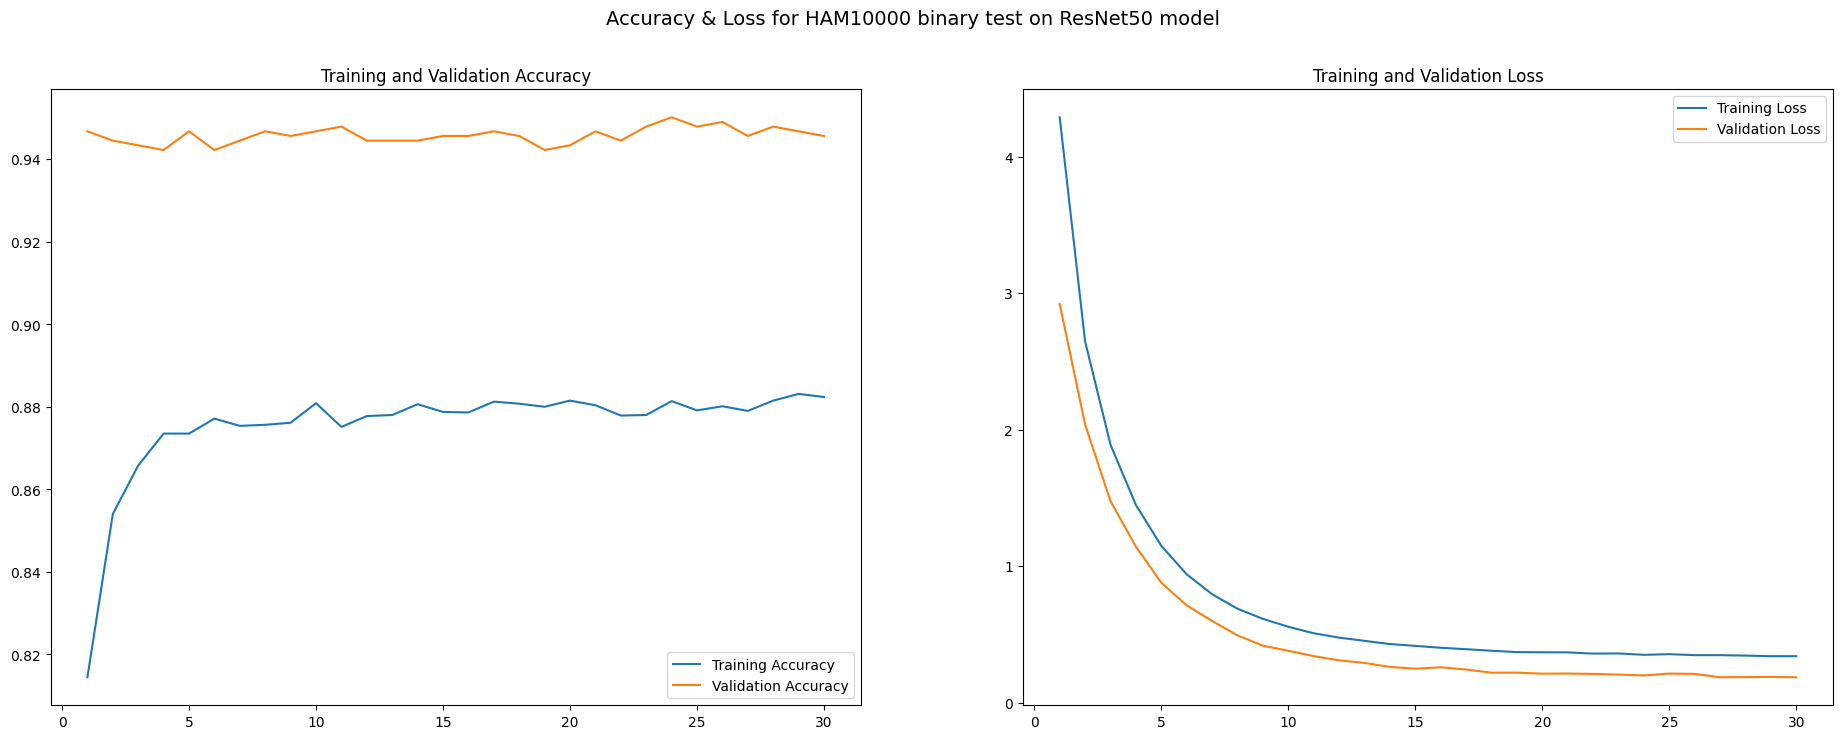

In [10]:
# HAM10000 binary test
base_model_binary = mel.CNN(img_size[0], img_size[1], None, HAM10000_binary_num_classes)
ResNet50_name = 'HAM10000 binary test on ResNet50'
Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

history_HAM10000_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_HAM10000,
    trainlabels = trainlabels_binary_HAM10000,
    validationimages = validationimages_HAM10000,
    validationlabels = validationlabels_binary_HAM10000,
    data_gen = data_gen_HAM10000
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_HAM10000_bin
)


Computing predictions for HAM10000 binary test on ResNet50...
Model report for HAM10000 binary test on ResNet50 model ->


Train Report :
               precision    recall  f1-score   support

Non-Melanoma       0.92      0.06      0.11      1029
    Melanoma       0.88      1.00      0.93      7000

    accuracy                           0.88      8029
   macro avg       0.90      0.53      0.52      8029
weighted avg       0.88      0.88      0.83      8029

Test Report :
               precision    recall  f1-score   support

Non-Melanoma       0.00      0.00      0.00        35
    Melanoma       0.97      1.00      0.98      1068

    accuracy                           0.97      1103
   macro avg       0.48      0.50      0.49      1103
weighted avg       0.94      0.97      0.95      1103



/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

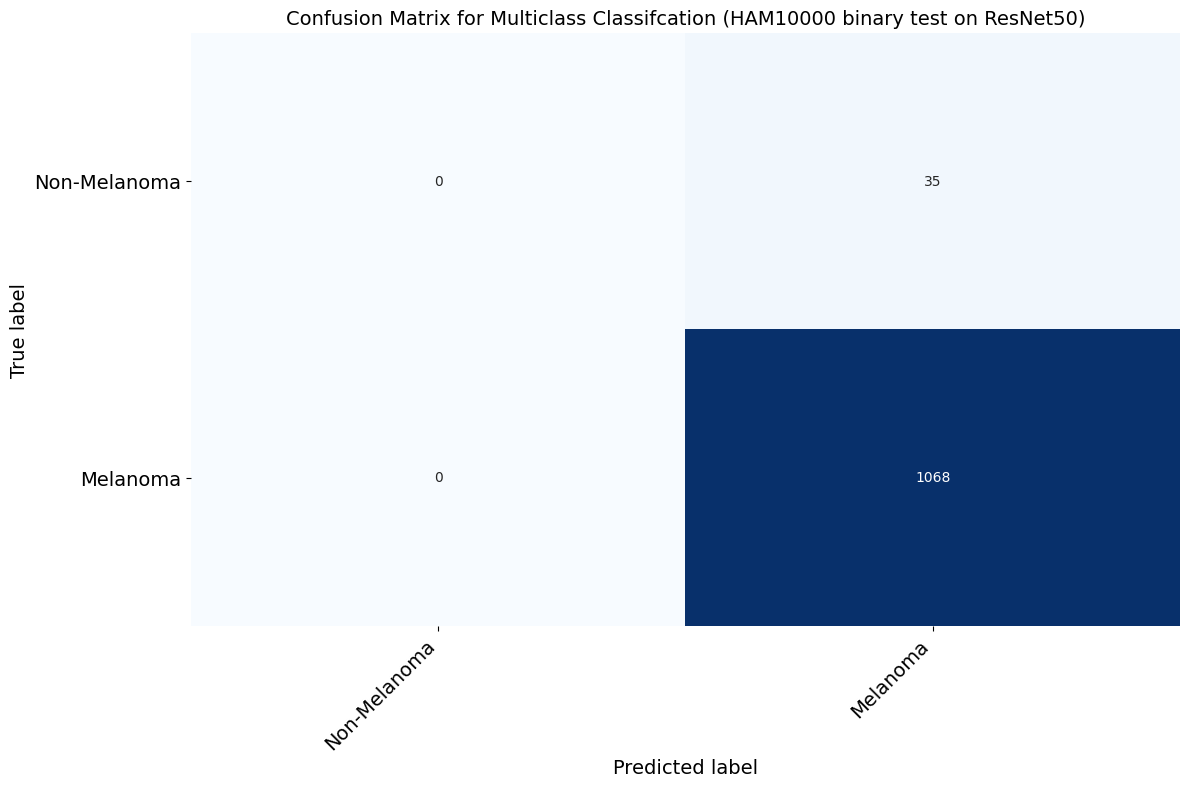

In [11]:
train_pred, train_pred_classes, test_pred, test_pred_classes = base_model_binary.computing_prediction(
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_HAM10000,
    testimages = testimages_HAM10000
)

test_pred, test_pred_classes

visualizer.model_report(
    model_name = ResNet50_name,
    trainlabels = trainlabels_binary_HAM10000,
    train_pred_classes = train_pred_classes,
    testlabels = testlabels_binary_HAM10000,
    test_pred_classes = test_pred_classes,
    lesion_type_dict = utilInstance.lesion_type_binary_dict_test_ISIC2016 # Needs to fix
)

In [27]:
# ISIC2016_binaryclass = (trainimages_ISIC2016, testimages_ISIC2016, validationimages_ISIC2016, trainlabels_binary_ISIC2016,
# testlabels_binary_ISIC2016, validationlabels_binary_ISIC2016, num_classes_ISIC2016)
trainimages_ISIC2016 = ISIC2016_binaryclass[0]
testimages_ISIC2016 = ISIC2016_binaryclass[1]
validationimages_ISIC2016 = ISIC2016_binaryclass[2]
trainlabels_binary_ISIC2016 = ISIC2016_binaryclass[3]
testlabels_binary_ISIC2016 = ISIC2016_binaryclass[4]
validationlabels_binary_ISIC2016 = ISIC2016_binaryclass[5]
ISIC2016_binary_num_classes = ISIC2016_binaryclass[6]

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Building ISIC2016 binary test on ResNet50 model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________
None
Fitting ISIC2016 binary test on ResNet50 model

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
35/35 [==============================] - 3s 87ms/step - loss: 5.3333 - accuracy: 0.7067 - val_loss: 4.7316 - val_accuracy: 0.8444
Epoch 3/30
35/35 [==============================] - 3s 86ms/step - loss: 5.0567 - accuracy: 0.7096 - val_loss: 4.4887 - val_accuracy: 0.8333
Epoch 4/30
35/35 [==============================] - 3s 88ms/step - loss: 4.7188 - accuracy: 0.7368 - val_loss: 4.2552 - val_accuracy: 0.8333
Epoch 5/30
35/35 [==============================] - 3s 86ms/step - loss: 4.4968 - accuracy: 0.7611 - val_loss: 4.0749 - val_accuracy: 0.8389
Epoch 6/30
35/35 [==============================] - 3s 94ms/step - loss: 4.2550 - accuracy: 0.7496 - val_loss: 3.8932 - val_accuracy: 0.8444
Epoch 7/30
35/35 [==============================] - 3s 86ms/step - loss: 4.0503 - accuracy: 0.7668 - val_loss: 3.7791 - val_accuracy: 0.8278
Epoch 8/30
35/35 [==============================] - 3s 87ms/step - loss: 3.8403 - accuracy: 0.7682 - val_loss: 3.6229 - val_accuracy: 0.8500
Epoch 9/30
35

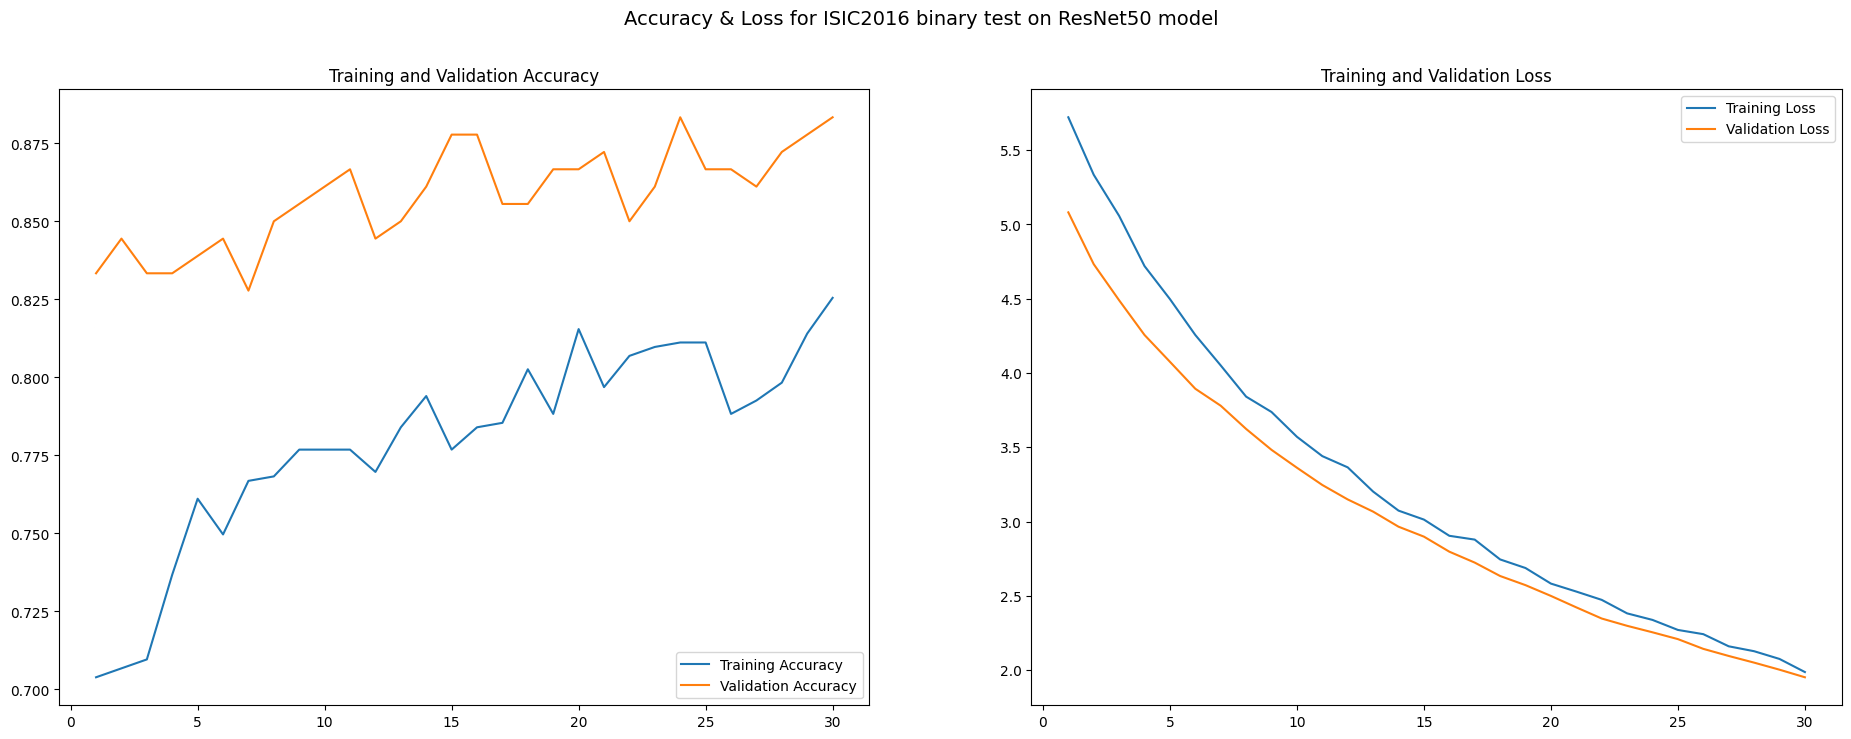

In [14]:
# ISIC2016 binary test
base_model_binary = mel.CNN(img_size[0], img_size[1], None, ISIC2016_binary_num_classes)
ResNet50_name = 'ISIC2016 binary test on ResNet50'
Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

history_ISIC2016_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_ISIC2016,
    trainlabels = trainlabels_binary_ISIC2016,
    validationimages = validationimages_ISIC2016,
    validationlabels = validationlabels_binary_ISIC2016,
    data_gen = data_gen_ISIC2016
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_ISIC2016_bin
)


Reloading 'melanoma.util'.
Computing predictions for ISIC2016 binary test on ResNet50...
Model report for ISIC2016 binary test on ResNet50 model ->


Train Report :
               precision    recall  f1-score   support

Non-Melanoma       0.83      0.99      0.91       576
    Melanoma       0.88      0.20      0.33       143

    accuracy                           0.84       719
   macro avg       0.86      0.60      0.62       719
weighted avg       0.84      0.84      0.79       719

Test Report :
               precision    recall  f1-score   support

Non-Melanoma       0.83      0.98      0.90       303
    Melanoma       0.71      0.20      0.31        75

    accuracy                           0.83       378
   macro avg       0.77      0.59      0.61       378
weighted avg       0.81      0.83      0.78       378



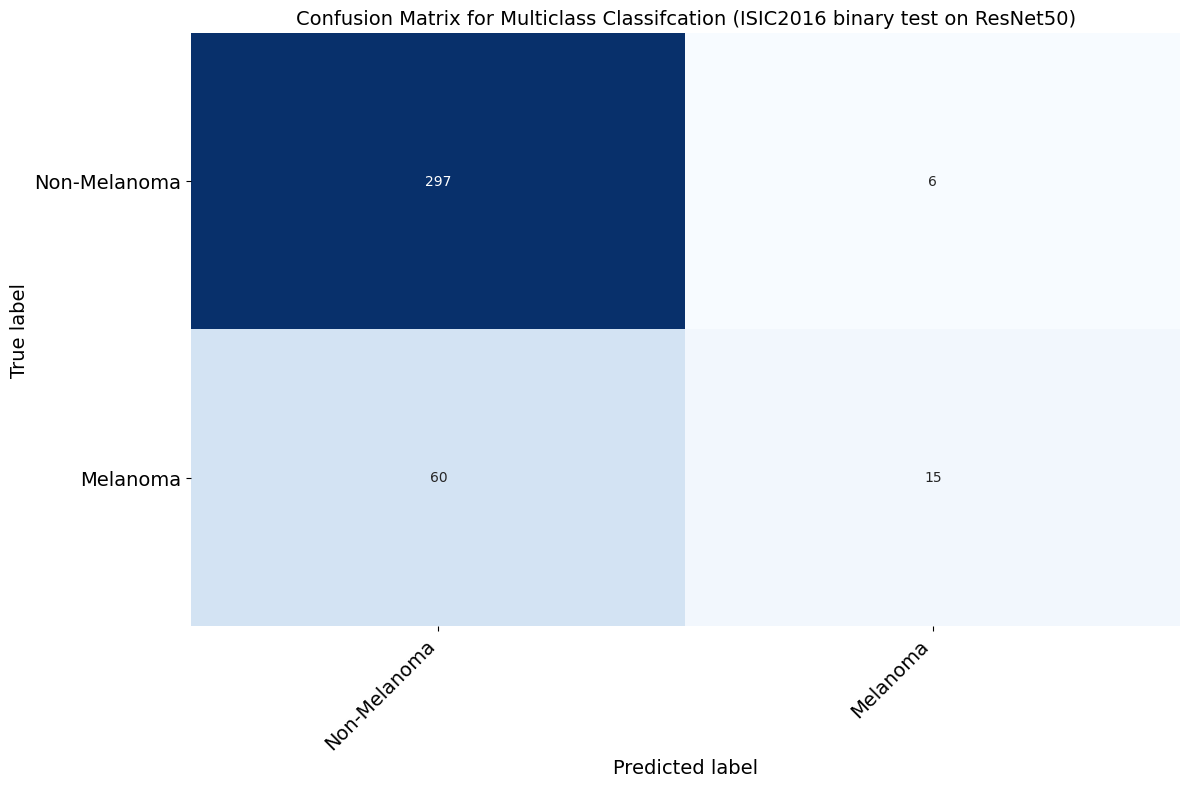

In [15]:
train_pred, train_pred_classes, test_pred, test_pred_classes = base_model_binary.computing_prediction(
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_ISIC2016,
    testimages = testimages_ISIC2016
)

test_pred, test_pred_classes

visualizer.model_report(
    model_name = ResNet50_name,
    trainlabels = trainlabels_binary_ISIC2016,
    train_pred_classes = train_pred_classes,
    testlabels = testlabels_binary_ISIC2016,
    test_pred_classes = test_pred_classes,
    lesion_type_dict = utilInstance.lesion_type_binary_dict_test_ISIC2016
)

In [37]:
# Now, let's combine HAM10000 and ISIC2016 DBs
trainimages_combination = {"HAM10000":trainimages_HAM10000, "ISIC2016":trainimages_ISIC2016}
testimages_combination = {"HAM10000":testimages_HAM10000, "ISIC2016":testimages_ISIC2016}
validationimages_combination = {"HAM10000":validationimages_HAM10000, "ISIC2016":validationimages_ISIC2016}
trainlabels_combination = {"HAM10000":[trainlabels_binary_HAM10000], "ISIC2016":[trainlabels_binary_ISIC2016]}
testlabels_combination = {"HAM10000":[testlabels_binary_HAM10000], "ISIC2016":[testlabels_binary_ISIC2016]}
validationlabels_combination = {"HAM10000":[validationlabels_binary_HAM10000], "ISIC2016":[validationlabels_binary_ISIC2016]}

trainimages_HAM10000_ISIC2016 = utilInstance.combine(**trainimages_combination)
testimages_HAM10000_ISIC2016 = utilInstance.combine(**testimages_combination)
validationimages_HAM10000_ISIC2016 = utilInstance.combine(**validationimages_combination)
trainlabels_binary_HAM10000_ISIC2016 = utilInstance.combine(**trainlabels_combination)
testlabels_binary_HAM10000_ISIC2016 = utilInstance.combine(**testlabels_combination)
validationlabels_binary_HAM10000_ISIC2016 = utilInstance.combine(**validationlabels_combination)


Combining: HAM10000
Combining: ISIC2016
Combining: HAM10000
Combining: ISIC2016
Combining: HAM10000
Combining: ISIC2016
Combining: HAM10000
Combining: ISIC2016
Combining: HAM10000
Combining: ISIC2016
Combining: HAM10000
Combining: ISIC2016


In [38]:
# HAM10000 + ISIC2016 binary test
base_model_binary = mel.CNN(img_size[0], img_size[1], None, ISIC2016_binary_num_classes)
ResNet50_name = 'HAM10000 + ISIC2016 binary test on ResNet50'
Resnet50_model = base_model_binary.resnet50(ResNet50_name)

# Install the below beforehand
# pip install pydot
# conda install -c anaconda graphviz
visualizer = mel.Visualizer()
visualizer.visualize_model(model = Resnet50_model, model_name = ResNet50_name)

history_HAM10000_ISIC2016_bin = base_model_binary.fit_model(    
    model = Resnet50_model,
    model_name = ResNet50_name,
    trainimages = trainimages_HAM10000_ISIC2016,
    trainlabels = trainlabels_binary_HAM10000_ISIC2016,
    validationimages = validationimages_HAM10000_ISIC2016,
    validationlabels = validationlabels_binary_HAM10000_ISIC2016,
    data_gen = data_gen_ISIC2016
)

visualizer.visualize_performance(
    model_name = ResNet50_name,
    history = history_HAM10000_ISIC2016_bin
)


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Building HAM10000 + ISIC2016 binary test on ResNet50 model...
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               262272    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 258       
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________
None
Fitting HAM10000 + ISIC2016 binary 

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (80528, 150, 3), y.shape = (719,)